# Churning Prediction with ANN,Keras


Getting the Lib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,LabelBinarizer


Setting the path to train test and validation dataset


In [3]:
Churning_train="train/churn_train.csv"
Churning_test="test/churn_train.csv"
Churning_pred="Validation/FinalPred.csv"

function to read the file as dataframe

In [4]:
def load_churning_data(datapath):
    return pd.read_csv(datapath)

In [5]:
#Loading the traing set
Churning_train_dataset=load_churning_data(Churning_train)
Churning_train_dataset.head(100)
Churning_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
st            3333 non-null object
acclen        3333 non-null int64
arcode        3333 non-null int64
intplan       3333 non-null object
voice         3333 non-null object
nummailmes    3333 non-null int64
phnum         3333 non-null object
tdmin         3333 non-null float64
temin         3333 non-null float64
tdcal         3333 non-null int64
tdchar        3333 non-null float64
tecal         3333 non-null int64
tecahr        3333 non-null float64
tnmin         3333 non-null float64
tncal         3333 non-null int64
tnchar        3333 non-null float64
timin         3333 non-null float64
tical         3333 non-null int64
ticharncsc    3333 non-null float64
label         3333 non-null int64
CHk           3333 non-null int64
dtypes: float64(8), int64(9), object(4)
memory usage: 546.9+ KB


In [6]:
#Finding stats distribution of the data
Churning_train_dataset.describe()

,acclen,arcode,nummailmes,tdmin,temin,tdcal,tdchar,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,ticharncsc,label,CHk
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,200.980348,100.435644,30.562307,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,50.713844,20.069084,9.259435,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,166.600000,87.000000,24.430000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,201.400000,101.000000,30.500000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,235.300000,114.000000,36.790000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,363.700000,165.000000,59.640000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [7]:
#Lookig at data distribution

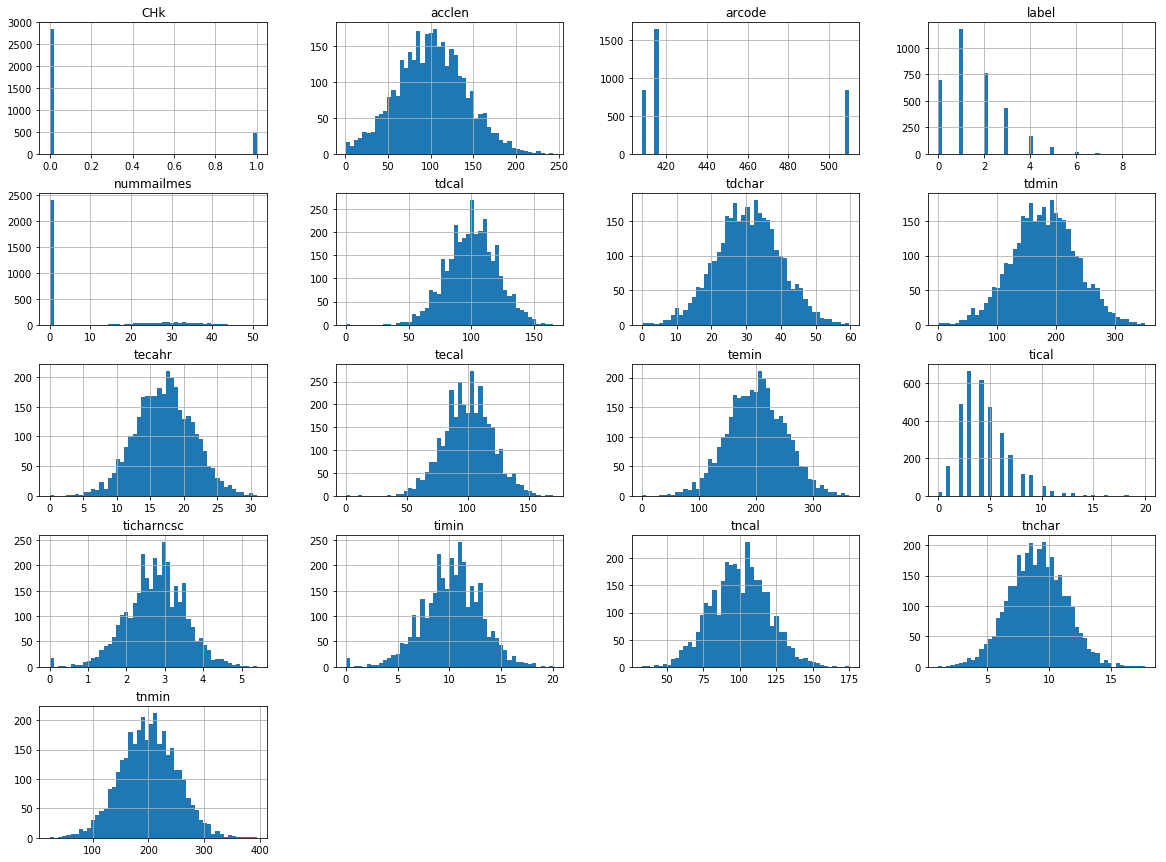

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
Churning_train_dataset.hist(bins=50,figsize=(20,15))
plt.show()

Data Preprocessing
<br>Fixing the Nummailmes attribute as its distribution looks sparse

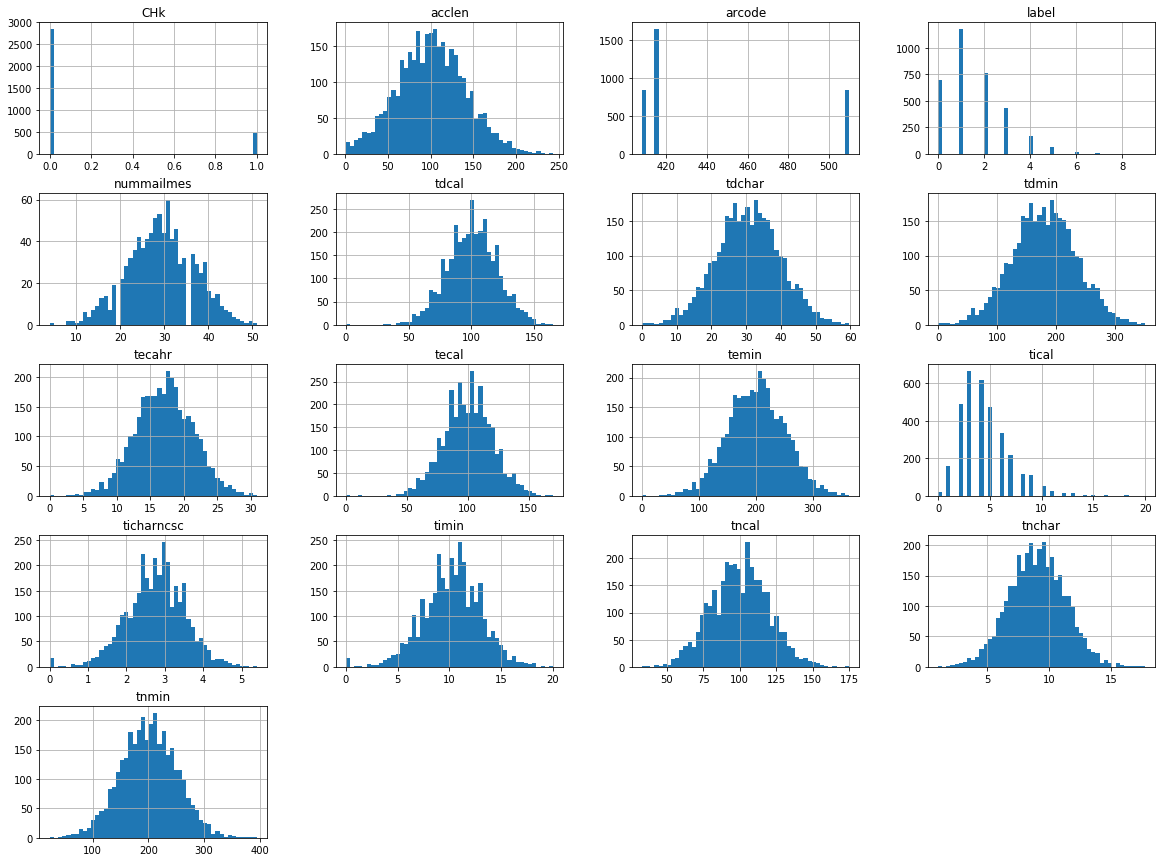

C:\Users\sanket_padte\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\sanket_padte\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [7]:
Churning_train_dataset.nummailmes=Churning_train_dataset.nummailmes.replace(0,np.NaN)
Churning_train_dataset.hist(bins=50,figsize=(20,15))
plt.show()
Churning_train_dataset.nummailmes.fillna(0)
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(Churning_train_dataset.iloc[:, 5].reshape(-1,1))
Churning_train_dataset.iloc[:,5]=imputer.transform(Churning_train_dataset.iloc[: ,5].reshape(-1,1)).reshape(-1)


In [16]:
#Creating Transformation Pipelines

In [9]:
corr_matrix=Churning_train_dataset.corr()


In [10]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributes_names):
        self.attributes_names=attributes_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attributes_names].values

In [21]:
X_train=Churning_train_dataset.iloc[:, 0: 20].values


In [22]:
y_train=Churning_train_dataset.iloc[:, 20].values


In [23]:
labelencoder=LabelEncoder()
X_train[:,3]=labelencoder.fit_transform(X_train[:,3])
X_train[:,4]=labelencoder.fit_transform(X_train[:,4])
X_train[:,6]=labelencoder.fit_transform(X_train[:,6])
X_train[:,0]=labelencoder.fit_transform(X_train[:,0])


In [24]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X_train = onehotencoder.fit_transform(X_train).toarray()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


In [25]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_

In [26]:
explained_variance

array([  2.96223426e-02,   2.93690307e-02,   2.90393320e-02,
         2.83382003e-02,   1.70709360e-02,   1.68930927e-02,
         1.65815272e-02,   1.64875060e-02,   1.61671366e-02,
         1.61152992e-02,   1.59089108e-02,   1.56818406e-02,
         1.55715261e-02,   1.54908980e-02,   1.52619451e-02,
         1.46741128e-02,   1.46450034e-02,   1.46343038e-02,
         1.46190765e-02,   1.46161151e-02,   1.46154129e-02,
         1.46105761e-02,   1.46010188e-02,   1.45971689e-02,
         1.45925243e-02,   1.45918644e-02,   1.45894839e-02,
         1.45854459e-02,   1.45841042e-02,   1.45788481e-02,
         1.45760112e-02,   1.45749112e-02,   1.45703248e-02,
         1.45670253e-02,   1.45631204e-02,   1.45607586e-02,
         1.45592021e-02,   1.45578773e-02,   1.45543473e-02,
         1.45520985e-02,   1.45463004e-02,   1.45418322e-02,
         1.45394959e-02,   1.45364454e-02,   1.45307608e-02,
         1.45277745e-02,   1.45210799e-02,   1.45055353e-02,
         1.44992304e-02,

In [161]:
pca=PCA(n_components=20)
X_reduced=pca.fit_transform(X_train)

In [27]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [30]:
cumsum

array([ 0.02962234,  0.05899137,  0.08803071,  0.11636891,  0.13343984,
        0.15033293,  0.16691446,  0.18340197,  0.1995691 ,  0.2156844 ,
        0.23159331,  0.24727515,  0.26284668,  0.27833758,  0.29359952,
        0.30827364,  0.32291864,  0.33755294,  0.35217202,  0.36678814,
        0.38140355,  0.39601412,  0.41061514,  0.42521231,  0.43980484,
        0.4543967 ,  0.46898618,  0.48357163,  0.49815574,  0.51273458,
        0.52731059,  0.54188551,  0.55645583,  0.57102286,  0.58558598,
        0.60014673,  0.61470594,  0.62926381,  0.64381816,  0.65837026,
        0.67291656,  0.68745839,  0.70199789,  0.71653433,  0.73106509,
        0.74559287,  0.76011395,  0.77461948,  0.78911871,  0.80357624,
        0.81795279,  0.83220607,  0.84638951,  0.86048709,  0.87396589,
        0.887298  ,  0.90061518,  0.91372537,  0.92662725,  0.93930286,
        0.95188704,  0.96411298,  0.97616311,  0.98818115,  0.99999988,
        0.99999999,  1.        ,  1.        ,  1.        ,  1.  